<a href="https://colab.research.google.com/github/Amal-Baby-Mathews/Mega_ML/blob/main/Reportwithcorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
!pip install google-generativeai
!pip install wandb

In [2]:
import numpy as np
import pandas as pd
import wandb #Wandb import
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from shap import KernelExplainer, summary_plot,sample

# **Notes on data preprocessing and the method used**
Selection process of the input fields:
From Operational Parameters defined in (Cinar, Samet, Senem Onen Cinar, Nils Wieczorek, Ihsanullah Sohoo, and Kerstin Kuchta. 2021. "Integration of Artificial Intelligence into Biogas Plant Operation" Processes 9, no. 1: 85. https://doi.org/10.3390/pr9010085)
Initial selection of fields:

be_stream2methane	al_productgasoutlet_temp

pdc_powermeterphasenuetral_amps

be_ambient_tt_scaled_value	be_scg_n2

be_system_abort_shutdown

In [5]:
# """ These are the data preprocessing steps taken from the dataset provided
# import pandas as pd
# import os
# def print_hour_from_timestamp(file_path, datetime_col='timestamp'):

#     Read a CSV file and print the hour of the recorded timestamp field for each line.

#     Args:
#         file_path (str): Path to the CSV file.
#         datetime_col (str, optional): Name of the column containing the datetime values. Default is 'timestamp'.
#     # Read the CSV file
#     df = pd.read_csv(file_path,usecols=fieldnames,nrows=3000)
#     df=df.dropna()
#     # Find and convert columns with 't' or 'f' values
#     for col in df.columns:
#         if df[col].dtype == object:  # Check for text columns
#             df[col] = df[col].replace({'t': 1, 'f': 0})
#     # Convert the datetime column to datetime format if it's not already
#     if not pd.api.types.is_datetime64_any_dtype(df[datetime_col]):
#         df[datetime_col] = pd.to_datetime(df[datetime_col])
#     df = df.sort_values(by=datetime_col)
#   # Group by date and then by hour
#     grouped = df.groupby([df[datetime_col].dt.date, df[datetime_col].dt.hour , df[datetime_col].dt.minute])

#     # Get the first row of each hour within each date group
#     first_hour_data = grouped.head(1)

#     # Print the results
#     print("First hour data: ",first_hour_data)
#     return first_hour_data

# folder_name=input("Enter the folder name: ")
# folder_path = r"C:\Users\seq_amal\biogas_dataset\{}".format(folder_name)
# fieldnames= [
#     'timestamp', 'be_aircomp_overlaptime_sp', 'be_aircomp_runtime_sp', 'be_ambient_tt_scaled_value', 'be_chiller_temp_sp',
#     'be_fc1_7031_xrc2_todayvol_real', 'be_fc1_7036_xrc2_todayenergy_real', 'be_fc1_7039_xmv2_sp_psia_dint',
#     'be_fc1_7039_xmv2_sp_psia_real', 'be_fc1_7042_xrc1_todayvol_real', 'be_fc1_7047_xrc1_todayenergy_real_mmbtu',
#     'be_fc1_7050_xmv1_sp_psia_dint', 'be_fc1_7050_xmv1_sp_psia_real', 'be_in_pa001a_spare', 'be_in_pa001b_spare',
#     'be_in_spare_local6_7', 'be_in_spare_msr111_estop', 'be_productgas_ch4', 'be_system_abort_bypass',
#     'be_system_abort_recycle', 'be_system_abort_shutdown', 'be_system_abort_standby', 'be_system_offspec',
#     'be_system_running', 'be_testaoi_o_scaled_value', 'be_aircomp1_faultstatus', 'be_aircomp1_runcmd',
#     'be_aircomp1_runstatus', 'be_aircomp2_faultstatus', 'be_aircomp2_runcmd', 'be_aircomp2_runstatus',
#     'be_airliquide_faultstatus', 'be_airliquide_runcmd', 'be_airliquide_runstatus', 'be_airliquideinlet_temperature_tt499',
#     'be_carbonvesselinlet_temperature_tt496', 'be_carbonvesselinletflow_ft418', 'be_compressordischarge_pressure_pt201',
#     'be_compressorsuction_pressure_pt303', 'be_condensatelevel_lt711', 'be_dginletisolationvalve105_closed',
#     'be_dginletisolationvalve105_open', 'be_dgventgasvalve172_closed', 'be_dgventgasvalve172_open',
#     'be_digestergas_temperature_tt127', 'be_flare_faultstatus', 'be_flare_runcmd', 'be_flare_runstatus',
#     'be_flarehandvalve144_closed', 'be_flarehandvalve144_open', 'be_gdchiller_faultstatus', 'be_gdchiller_runcmd',
#     'be_gdchiller_runstatus', 'be_h2sremovalvalve181_closed', 'be_h2sremovalvalve181_open', 'be_is_vilter1_targetsp',
#     'be_is_vilter2_targetsp', 'be_instrumentair_pressure_pt826', 'be_pgoffspecreturnvalve630_closed',
#     'be_pgoffspecreturnvalve630_open', 'be_pgoutletvalve604_closed', 'be_pgoutletvalve604_open',
#     'be_pgtruckunloadvalve644_closed', 'be_pgtruckunloadvalve644_open', 'be_pgventgasvalve603_closed',
#     'be_pgventgasvalve603_open', 'be_scg_ch4', 'be_scg_co2', 'be_scg_energytotal', 'be_scg_flowindicator',
#     'be_scg_general_alarm', 'be_scg_h2s', 'be_scg_n2', 'be_scg_o2', 'be_scg_offspec_alarm', 'be_scg_offspeclatch_alarm',
#     'be_scg_online_status', 'be_scg_pressureindicator', 'be_scg_temperatureindicator', 'be_scg_totaldaily',
#     'be_stream1co2', 'be_stream1flow', 'be_stream1h2s', 'be_stream1methane', 'be_stream1n2', 'be_stream1o2',
#     'be_stream1pressure', 'be_stream1temp', 'be_stream2co2', 'be_stream2flow', 'be_stream2h2s', 'be_stream2methane',
#     'be_stream2n2', 'be_stream2o2', 'be_stream2pressure', 'be_stream2temp', 'be_stream3co2', 'be_stream3flow',
#     'be_stream3h2s', 'be_stream3methane', 'be_stream3n2', 'be_stream3o2', 'be_stream3pressure', 'be_stream3temp',
#     'be_sumplevel_lt171', 'be_sumpvalve173_closed', 'be_sumpvalve173_open', 'be_systemfault_1', 'be_systemfault_2',
#     'be_systemfault_3', 'be_vilterchiller_faultstatus', 'be_vilterchiller_runcmd', 'be_vilterchiller_runstatus',
#     'be_viltercomp1_faultstatus', 'be_viltercomp1_runcmd', 'be_viltercomp1_runstatus', 'be_viltercomp2_faultstatus',
#     'be_viltercomp2_runcmd', 'be_viltercomp2_runstatus', 'be_wastegasflow_ft437', 'al_cr_7_do', 'al_fv_3a_2b_do',
#     'al_fv_9_cmd', 'al_systemfaults_1', 'al_systemfaults_2', 'al_productgasoutlet_temp', 'al_zi_2_do', 'al_zi_5_do',
#     'al_filter2_differentialpressure', 'al_flowcontrolvalve_position', 'al_hex2filter_level', 'al_pit3_pressure',
#     'al_pit7_pressure', 'al_premembranegaso2_analyzervalue', 'al_processgasinlet_pressure', 'al_processgasinlet_temp',
#     'al_productgas_pressure', 'al_productgasco2_analyzervalue', 'al_productgaso2_analyzervalue', 'al_stage1permeate_pressure',
#     'vl_chiller_suctionscrubberinlet_pressure', 'vl_chiller_suctionscrubberoutlet_pressure',
#     'vl_chiller_dischargescrubberinlet_pressure', 'vl_chiller_dischargescrubberoutlet_pressure',
#     'vl_chiller_aftercoolerinlet_temp', 'vl_chiller_aftercooleroutlet_temp', 'vl_chiller_dischargescrubberoutlet_temp',
#     'vl_chiller_reheateroutlet_temp', 'vl_chiller_recyclevalve_position', 'pdc_powermeter3ph_watts', 'pdc_powermeterab_voltage',
#     'pdc_powermeteraan_voltage', 'pdc_powermeterbc_voltage', 'pdc_powermeterphasea_amps', 'pdc_powermeterphaseb_amps',
#     'pdc_powerpeterphasec_amps', 'pdc_powermeterphasenuetral_amps', 'fl_flamearrestor_temp', 'fl_inletvalve_closed', 'fl_inletvalve_open', 'fl_inlet_flow', 'fl_mainflame_on', 'fl_pilotflame_on', 'fl_pilotflame_temp', 'fl_propanetankvalve_open', 'fl_stackfire_temp', 'fl_stacktip_temp', 'gd_chiller_glycoltemp_sp', 'gd_chiller_reservoir_level', 'gd_chiller_returnline_temp', 'gd_chiller_supplyline_pressure', 'gd_chiller_supplyline_temp'
# ]
# output_file = r"C:\Users\seq_amal\biogas_dataset\temperory_dataset_with_timestamp_test_2.csv"
# csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]
# datetime_col = "timestamp"
# dates=set()
# if csv_files:
#     combined_dataset = pd.DataFrame(columns=fieldnames)

#     for file in csv_files:
#         file_path = os.path.join(folder_path, file)
#         #current_df = pd.read_csv(file_path, usecols=fieldnames)
#         df=print_hour_from_timestamp(file_path, datetime_col=datetime_col)
#         combined_dataset = pd.concat([combined_dataset, df], ignore_index=True)

#     combined_dataset['be_system_abort_shutdown'] = combined_dataset['be_system_abort_shutdown'].replace({'f': 0, 't': 1})
#     combined_dataset.to_csv(output_file, index=False)
#     print(f"CSV files appended to: {output_file}")

# else:
#     print("No CSV files found in the specified folder.")
# """

In [ ]:
from google.colab import userdata
wandbkey=userdata.get('WANDB_KEY')
wandb.login(key=wandbkey)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
run = wandb.init(project="lstm_biogas_project")


In [9]:
shift =-1000
datawindow=1000
threshold=0.7 #failure threshold of the probabilty of failure
target='be_system_abort_shutdown'

In [10]:

data = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp.csv')
data = data.dropna()

# Extract the date part from the timestamp column (directly)
# Convert the timestamp column to datetime format (assuming it's currently strings)
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Group by month (using 'M' for monthly frequency)
monthly_data = data.resample('M', on='timestamp')

# Get the size of the first month (assuming all months have the same number of rows)
number_of_rows_per_month = monthly_data.size().iloc[0]

print(f"Number of rows constituting a month's worth: {number_of_rows_per_month}")

# Group by week (using 'W' for weekly frequency)
weekly_data = data.resample('W', on='timestamp')

# Get the size of the first week (assuming all weeks have the same number of rows)
number_of_rows_per_week = weekly_data.size().iloc[0]

print(f"Number of rows constituting a week's worth: {number_of_rows_per_week}")

# Group by day (using 'D' for daily frequency)
daily_data = data.resample('D', on='timestamp')

# Get the size of the first day (assuming all days have the same number of rows)
number_of_rows_per_day = daily_data.size().iloc[0]

print(f"Number of rows constituting a day's worth: {number_of_rows_per_day}")

Number of rows constituting a month's worth: 15755
Number of rows constituting a week's worth: 4296
Number of rows constituting a day's worth: 1427


In [11]:
data = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp.csv')
data = data.dropna()
data=data.drop("timestamp",axis=1)
data[target].shift(periods=shift, fill_value=0)
X = data.drop(target, axis=1)
y = data[target]

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [13]:
print(X.head(3))
print(y.head(3))

   be_stream2methane  al_productgasoutlet_temp  \
0          97.059998                 79.750000   
1          97.059998                 79.859375   
2          97.059998                 79.921875   

   pdc_powermeterphasenuetral_amps  be_ambient_tt_scaled_value  be_scg_n2  
0                         7.075465                   21.080000   0.813418  
1                         7.198024                   21.129999   0.813418  
2                         7.197492                   21.080000   0.813418  
0    0
1    0
2    0
Name: be_system_abort_shutdown, dtype: int64


In [14]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
wandb.config = {
    "learning_rate": model.optimizer.learning_rate,  # Access learning rate from optimizer
    "epochs": 2,  # Assuming 2 epochs for this example
    "lstm_units": 64,  # Log LSTM units
    "input_shape": X_train.shape[1:]  # Log input shape without batch dimension
}
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=[early_stop])


In [ ]:
epoch=1
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, callbacks=[early_stop])

# Log metrics after each epoch
wandb.log({"loss": history.history['loss'][-1]}, step=epoch)  # Log training loss
wandb.log({"val_loss": history.history['val_loss'][-1]}, step=epoch)  # Log validation loss
wandb.log({"accuracy": history.history['accuracy'][-1]}, step=epoch)  # Log training accuracy
wandb.log({"val_accuracy": history.history['val_accuracy'][-1]}, step=epoch)  # Log validation accuracy

# Finish the W&B run
wandb.finish()

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


NameError: name 'model' is not defined

In [17]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Create a separate model for SHAP
input_layer = Input(shape=(X_train.shape[1] * X_train.shape[2],))
reshaped = Reshape((X_train.shape[1], X_train.shape[2]))(input_layer)
output = model_lstm(reshaped)
model_shap = Model(inputs=input_layer, outputs=output)

# Prepare the data for feature importance analysis
background_data = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
background_data_summary = sample(background_data, 1)  # Use 1000 representative samples
explainer = KernelExplainer(model_shap.predict, background_data_summary)

# Downsample X_test to 5000 samples
X_test_downsampled = resample(X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]),
                              replace=False,
                              n_samples=50,
                              random_state=42)

# Calculate feature importance using SHAP
shap_values = explainer.shap_values(X_test_downsampled)
#summary_plot(shap_values, X.columns)


1/1 [==============================] - 1s 508ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


In [18]:
def predict_failure(data):
    data_scaled = scaler.transform(data)
    data_reshaped = data_scaled.reshape((-1, 1,data_scaled.shape[1]))
    prediction = model.predict(data_reshaped)
    failure_probability = np.max(prediction)#Changes made here for probabilty correction
    return failure_probability,prediction

# Set a threshold for failure prediction
failure_threshold = 0.7

In [19]:
def retrain_model(run_no,data,model=model,model_lstm=model_lstm):
  X = data.drop('be_system_abort_shutdown', axis=1)
  y = data['be_system_abort_shutdown']
  print(f"Data Used:{X.head()},{y.head()}")
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

  # Reshape the input data for LSTM
  X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
  X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
  early_stop = EarlyStopping(monitor='val_loss', patience=5)
  #model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=[early_stop])
  run = wandb.init(project="lstm_biogas_project",name=f"run_{run_no}")
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=[early_stop])

  # Log metrics after each epoch
  wandb.log({"loss": history.history['loss'][-1]}, step=epoch)  # Log training loss
  wandb.log({"val_loss": history.history['val_loss'][-1]}, step=epoch)  # Log validation loss
  wandb.log({"accuracy": history.history['accuracy'][-1]}, step=epoch)  # Log training accuracy
  wandb.log({"val_accuracy": history.history['val_accuracy'][-1]}, step=epoch)  # Log validation accuracy

# Finish the W&B run
  wandb.finish()
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test accuracy: {test_acc}')
  # Create a separate model for SHAP
  input_layer = Input(shape=(X_train.shape[1] * X_train.shape[2],))
  reshaped = Reshape((X_train.shape[1], X_train.shape[2]))(input_layer)
  output = model_lstm(reshaped)
  model_shap = Model(inputs=input_layer, outputs=output)

  # Prepare the data for feature importance analysis
  background_data = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
  background_data_summary = sample(background_data, 1)  # Use 1000 representative samples
  explainer = KernelExplainer(model_shap.predict, background_data_summary)

  # Downsample X_test to 5000 samples
  X_test_downsampled = resample(X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]),
                                replace=False,
                                n_samples=6,
                                random_state=42)

  # Calculate feature importance using SHAP
  shap_values = explainer.shap_values(X_test_downsampled)
  import matplotlib.pyplot as plt
  #import numpy as np  # Ensure numpy is imported for mean and std calculations

  feature_names = X.columns

  # Create a color map for better visualization
  cmap = plt.get_cmap('Blues')

  # Calculate SHAP value statistics (corrected for multi-dimensional arrays)
  shap_values_mean = np.mean(shap_values, axis=0)
  shap_values_std = np.std(shap_values, axis=0)

  # Plot SHAP values (corrected color assignment using a loop)
  plt.figure(figsize=(12, 8))
  for i in range(len(feature_names)):
      color = cmap(i / len(feature_names))  # Assign varying colors for better visualization
      plt.bar(i, shap_values_mean[i], yerr=shap_values_std[i], capsize=5, color=color, edgecolor='black')

  plt.xticks(range(len(feature_names)), feature_names, rotation=90)
  plt.xlabel('Feature')
  plt.ylabel('SHAP Value')
  plt.title('SHAP Value Distribution +SHAP value indicate that particular field is more likely to have caused the failure in the system')
  plt.tight_layout()
  plt.show()
  return model,shap_values

In [20]:
import google.generativeai as genai
from google.colab import userdata
gemini_key=userdata.get("GEMINI_API_KEY")

genai.configure(api_key = gemini_key)
gem_model = genai.GenerativeModel('gemini-pro')

In [21]:
from IPython.display import Markdown
def gemini(prompt):
  """
  Sends a prompt to the Gemini model and displays the generated response (with error handling).

  Args:
      prompt: The text prompt to send to the Gemini model.
  """
  try:
    response = gem_model.generate_content(prompt, stream=True)
    for chunk in response:
      display(Markdown(chunk.text))
  except Exception as e:
    print(f"Error during generating text: {e}")

In [22]:
data_new = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_test.csv')
def get_latest_train_data(window_size=1000,data=data_new):
    data = data.dropna()
    data=data.drop("timestamp",axis=1)
    data[target].shift(periods=shift, fill_value=0)
    # Handle window size of 0 (return entire dataset)
    if window_size == 0:
      return data.copy()  # Return a copy to avoid modifying original data
    else:
      for i in range(0, len(data), window_size):
        end_index = min(i + window_size, len(data))  # Ensure end doesn't exceed data length
        new_data = data[i:end_index]
        yield new_data.copy()  # Return a copy

In [23]:
def get_latest_system_data(data=data_new):
    # get only X from the data to pass for prediction
    X_pred= data.drop(target, axis=1)
    return X_pred

     be_stream2methane  al_productgasoutlet_temp  \
263          97.400002                 50.312500   
264          97.400002                 50.281250   
265          97.400002                 50.250000   
266          97.400002                 50.203125   
267          97.400002                 50.156250   

     pdc_powermeterphasenuetral_amps  be_ambient_tt_scaled_value  be_scg_n2  \
263                         0.257775                   19.379999   1.198203   
264                         0.251871                   19.379999   1.198203   
265                         0.403917                   19.370001   1.198336   
266                         0.387827                   19.360001   1.198336   
267                         0.411666                   19.320000   1.198336   

     be_system_abort_shutdown  
263                         1  
264                         1  
265                         1  
266                         1  
267                         1  
32/32 [=============

Epoch 1/2
25/25 [==============================] - 0s 7ms/step - loss: 0.0733 - accuracy: 0.9675 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 2/2
25/25 [==============================] - 0s 5ms/step - loss: 0.0601 - accuracy: 0.9675 - val_loss: 0.0087 - val_accuracy: 1.0000


accuracy,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.9675
loss,0.06011
val_accuracy,1.0
val_loss,0.00871


7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 1s 796ms/step


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


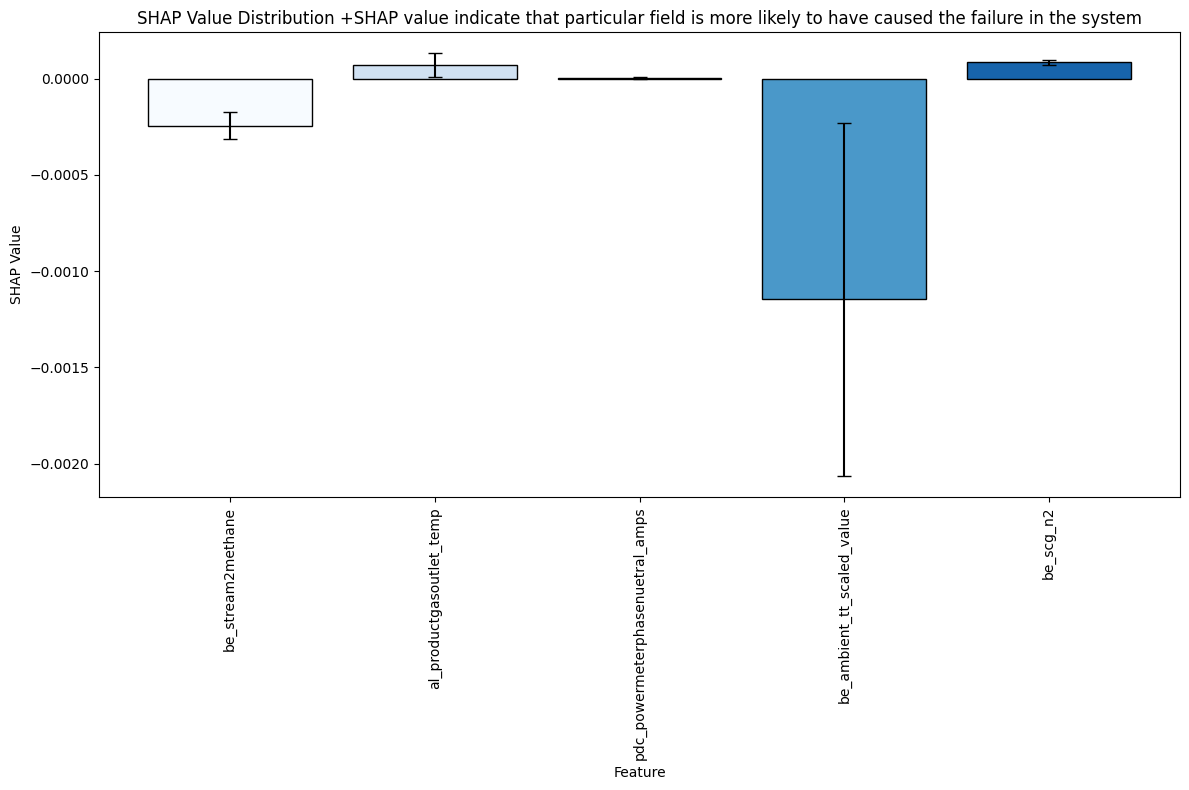

**Analysis of Biogas Process Data:**

The current operating parameters indicate that the

 biogas process is functioning within acceptable limits, except for the following:

1. **Gas Outlet Temperature:** The high outlet temperature (19.379

9991607666°C) suggests inefficient cooling or heat loss. This may lead to reduced methane production and increased energy consumption.

**Recommendations for Preventing or Mitigating Potential Failures:**

1. **Investigate gas outlet temperature:** Inspect the cooling system (e.g., heat

 exchangers, pumps) for any potential malfunctions or blockages causing inefficient cooling. Optimize the cooling process to maintain an optimal outlet temperature.
2. **Monitor process parameters:** Continuously monitor critical process parameters, such as nitrogen and methane concentrations, to detect any deviations. Adjust process conditions promptly to maintain optimal gas composition.
3. **Optimize power consumption:** The high power meter phase-neutral amps (1.1982029676437378A) indicate potential for power optimization. Investigate equipment efficiency and consider implementing measures to reduce energy consumption.
4. **Regular maintenance:** Schedule regular maintenance

 checks on all equipment, including the digester, cooling system, and gas analyzers. This will help identify and address any potential issues before they escalate into major failures.
5. **Train operating personnel:** Ensure that operating personnel are well-versed in the biogas process and best practices. This will empower them to respond appropriately to process deviations and prevent potential failures.

System operating normally. Failure probabilty: 0.10
      be_stream2methane  al_productgasoutlet_temp  \
1269          97.379997                 79.578125   
1270          97.379997                 79.468750   
1271          97.379997                 79.421875   
1272          97.379997                 79.421875   
1273          97.379997                 79.468750   

      pdc_powermeterphasenuetral_amps  be_ambient_tt_scaled_value  be_scg_n2  \
1269                         7.264143                   18.080000   1.197554   
1270                         7.197400                   17.410000   1.197554   
1271                         7.071822                   16.990000   1.196148   
1272                         7.072230                   16.969999   1.196148   
1273                         7.040030                   17.379999   1.196148   

      be_system_abort_shutdown  
1269                         0  
1270                         0  
1271                         0  
1272            

Epoch 1/2
25/25 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 2/2
25/25 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000


accuracy,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,1.0
loss,0.01325
val_accuracy,1.0
val_loss,0.00869


7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 0s 446ms/step


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


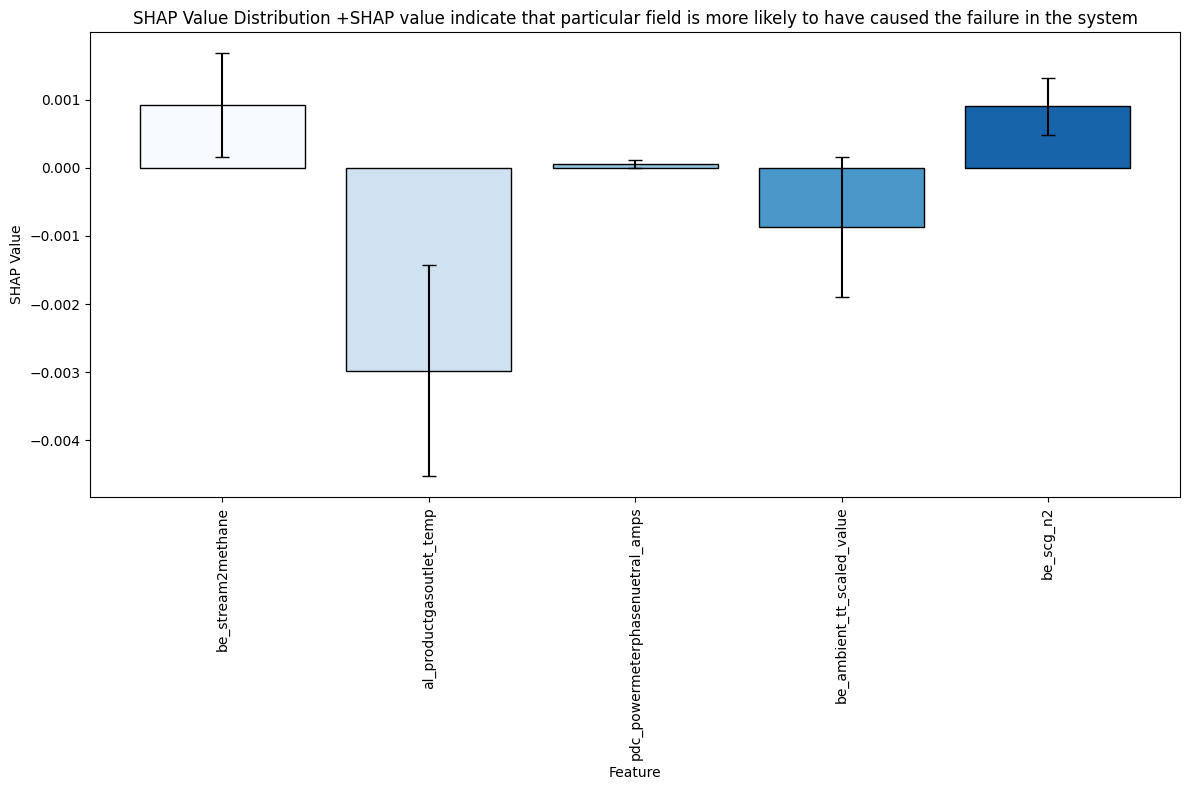

**Analysis:**

The current biogas process appears to be operating within normal parameters,

 with no immediate concerns identified from the provided data. However, to prevent potential failures and optimize process efficiency, the following actions are recommended:

* **Monitor gas

 composition regularly:** Ensure continuous monitoring of nitrogen and methane concentrations to ensure optimal levels for efficient biogas production.
* **Control ambient temperature:** Maintain ambient temperature within a suitable range to support optimal microbial activity responsible for biogas generation.
* **Maintain proper gas outlet temperature:** Ensure the gas outlet temperature is within the desired range to

 prevent condensation or other issues that could affect process efficiency.
* **Track power consumption:** Monitor power meter phase-neutral amps to identify any abnormalities or increases in power consumption, indicating potential equipment issues.

System operating normally. Failure probabilty: 0.01
      be_stream2methane  al_productgasoutlet_temp  \
2276          97.470001                 79.578125   
2277          97.470001                 79.609375   
2278          97.470001                 79.609375   
2279          97.470001                 79.671875   
2280          97.470001                 79.859375   

      pdc_powermeterphasenuetral_amps  be_ambient_tt_scaled_value  be_scg_n2  \
2276                         7.295257                   18.209999   1.198115   
2277                         7.293820                   18.530001   1.198115   
2278                         7.228945                   18.850000   1.198115   
2279                         7.165092                   19.120001   1.198115   
2280                         7.133660                   19.379999   1.198115   

      be_system_abort_shutdown  
2276                         0  
2277                         0  
2278                         0  
2279            

Epoch 1/2
25/25 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 2/2
25/25 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000


accuracy,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,1.0
loss,0.00451
val_accuracy,1.0
val_loss,0.00467


7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 0s 430ms/step


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


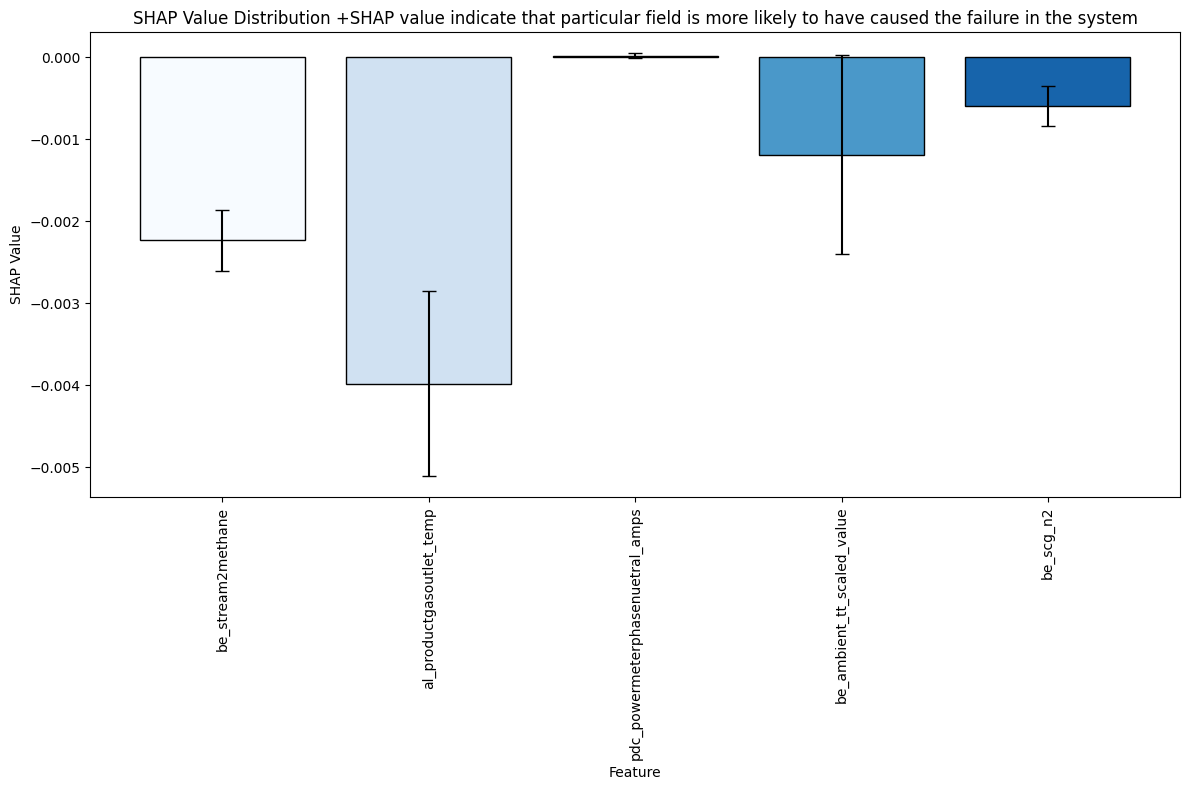

**Analysis:**

The current Biogas process is operating within acceptable parameters as determined

 by the SHAP values:

* **Ambient Temperature**: The ambient temperature is within the optimal range for biogas production, with a low SHAP value indicating minimal

 impact.
* **Nitrogen Concentration**: The nitrogen concentration is within the expected range, with a low SHAP value indicating minimal impact.
* **Methane Concentration**: The methane concentration is within the desired range, with a very low SHAP value indicating minimal impact.
* **Gas Outlet Temperature**: The gas outlet

 temperature is within the optimal range for biogas production, with a low SHAP value indicating minimal impact.
* **Power Meter Phase-Neutral Amps**: The power meter amps are within the expected range, with a low SHAP value indicating minimal impact.

**Recommendations:**

* Continue monitoring these parameters to ensure that they remain within acceptable ranges.
* Consider optimizing the process by exploring operating conditions that could improve methane yield or reduce energy consumption.
* Implement regular maintenance and inspection schedules to ensure that all equipment is operating efficiently and to identify potential failures early.
* Regularly review process data to identify any trends or patterns that may indicate potential

 failures, such as deviations from normal operating parameters.
* Consider implementing predictive maintenance techniques, such as condition monitoring and data analysis, to identify potential failures before they occur.

System operating normally. Failure probabilty: 0.00
      be_stream2methane  al_productgasoutlet_temp  \
3284          97.409897                 80.203125   
3285          97.409897                 80.140625   
3286          97.409897                 80.015625   
3287          97.409897                 79.968750   
3288          97.409897                 79.968750   

      pdc_powermeterphasenuetral_amps  be_ambient_tt_scaled_value  be_scg_n2  \
3284                         7.265648                   18.280001   1.177068   
3285                         7.233766                   18.590000   1.177068   
3286                         7.297692                   18.860001   1.177068   
3287                         7.330820                   19.049999   1.177060   
3288                         7.234933                   19.209999   1.177060   

      be_system_abort_shutdown  
3284                         0  
3285                         0  
3286                         0  
3287            

Epoch 1/2
25/25 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/2
25/25 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000


accuracy,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,1.0
loss,0.00212
val_accuracy,1.0
val_loss,0.00133


7/7 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 0s 400ms/step


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


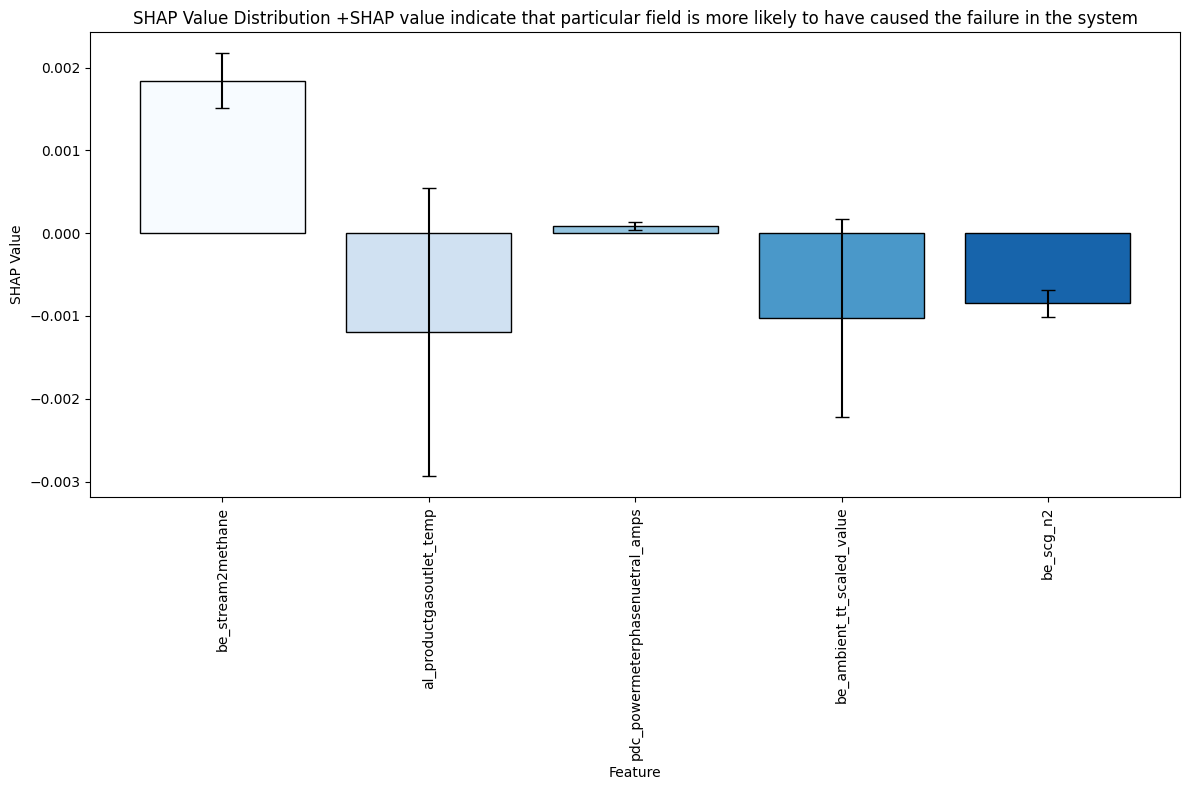

KeyboardInterrupt: 

In [24]:
 # Set the desired window size
trainer_generator=get_latest_train_data(window_size=datawindow,data=data_new)
run_no=0
while True:
  run_no+=1
  # Get the latest system data
  new_data = next(trainer_generator)#stream in chunk of new data
  print(new_data.head())
  latest_pred_data=get_latest_system_data(new_data)#new data processed to get only training data
  # Predict failure probability
  failure_prob,prediction = predict_failure(latest_pred_data)
  model,shap_values=retrain_model(run_no,new_data)
  shaps=shap_values[0].tolist()
  prompt = f"""**Biogas Process Analysis with Gemini-Pro**
  Current Biogas Process Data and the corresponding SHAP values:
  * Ambient Temperature: {new_data.iloc[0][0]}°C with SHAP value:{shaps[0]}.
  * Nitrogen Concentration: {new_data.iloc[0][1]}% with SHAP value:{shaps[1]}.
  * Methane Concentration: {new_data.iloc[0][2]}% with SHAP value:{shaps[2]}.
  * Gas outlet Temperature: {new_data.iloc[0][3]}°C with SHAP value:{shaps[3]}.
  * Power Meter Phase-Neutral Amps: {new_data.iloc[0][4]}A with SHAP value:{shaps[4]}.

  **Based on the data above, can you analyze the current state of the Biogas process and recommend actions to prevent or mitigate potential failures? Note that i am using an LSTM model to predict the failure probabilty also and i have also provided the SHAP values.[Only output the analysis do not mention the LSTM or SHAP]**"""
  gemini(prompt)
  if failure_prob > threshold:
      print(f'Potential system failure detected! Probability: {failure_prob:.9f}')
      print('Field variations contributing to the failure:')
      for feature, importance_list in zip(X.columns, shap_values[0].tolist()):
            for importance in importance_list:
                if importance > 0:
                    #if abs(importance) > 0.001:  # Print only if the absolute SHAP value is greater than 0.001
                    print(f'- {feature}: Importance = {"{}".format(importance)}')
      break

  else:
      print(f'System operating normally. Failure probabilty: {failure_prob:.2f}')



In [25]:
datas = pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_test_2.csv')
datas = datas.dropna()
time=datas["timestamp"]
datas=datas.drop("timestamp",axis=1)
actual_targets = datas[target].shift(periods=-shift, fill_value=0).values
d_data=get_latest_system_data(datas)
_,predictions= predict_failure(d_data)
print(actual_targets)

314/314 [==============================] - 1s 2ms/step
[0 0 0 ... 0 0 0]


In [26]:
import matplotlib.pyplot as plt

# Assuming 'target' is the column containing actual target values

plt.figure(figsize=(10, 8))  # Increase the figure height to accommodate two subplots


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [27]:
import numpy as np

# Assuming predictions is a 1D NumPy array

window_size = -shift
max_probs = np.zeros(len(predictions))  # Pre-allocate memory for the new array

# Loop through the predictions array with a sliding window, adjusting for out-of-bounds indices
for i in range(len(max_probs)):

    window_start = max(0, i - window_size)  # Ensure window_start is not negative
    #print(i, window_start)
    window_end = i

    # Handle empty windows:
    if (window_end-window_start) == 0:  # If window_start and window_end are the same, the window is empty
        max_probs[i] = 0  # Assign 0 to the maximum probability (or any other appropriate value)
    else:
        #print(window_start,window_end)
        #print(predictions[window_start+1:window_end+10])
        max_probs[i] = np.max(predictions[window_start:window_end+1])  # Calculate the maximum for non-empty windows


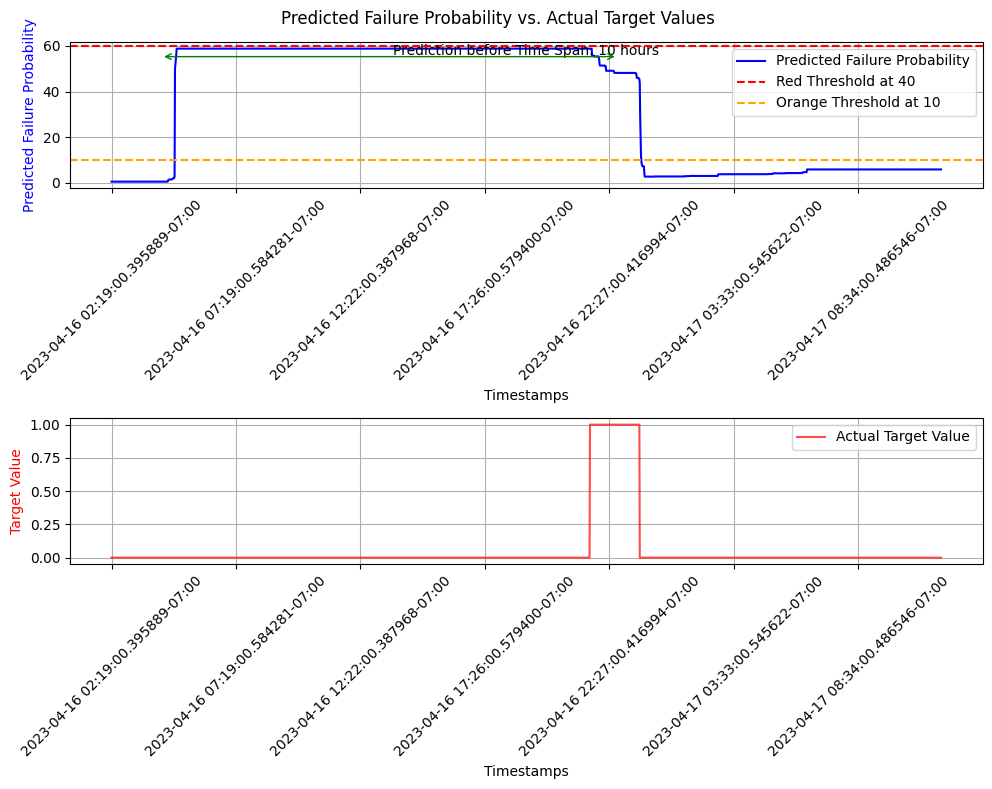

In [28]:
import matplotlib.pyplot as plt

# Assuming 'target' is the column containing actual target values

plt.figure(figsize=(10, 8))  # Increase the figure height to accommodate two subplots

# Ensure predictions are scaled to a meaningful range (e.g., 0-700%)

predictions_scaled = max_probs * 1100

# Create the first subplot for predicted probability

plt.subplot(2, 1, 1)  # (rows, columns, subplot_index)

start_idx = 3000

end_idx = 5000

plt.plot(time.iloc[start_idx:end_idx], predictions_scaled[start_idx:end_idx], color='blue', label='Predicted Failure Probability')

plt.axhline(y=60, color='red', linestyle='--', label='Red Threshold at 40')

plt.axhline(y=10, color='orange', linestyle='--', label='Orange Threshold at 10')

plt.ylabel('Predicted Failure Probability', color='blue')

plt.xlabel("Timestamps")

plt.xticks(time.iloc[start_idx:end_idx].values[::300], rotation=45)  # Set x-ticks with a step of 300 and rotate labels

# Add the double-sided arrow for the time span

arrow_x_start = 0.1
arrow_x_end = 0.6
arrow_y = 0.9
text_y = arrow_y + 0.01  # Raise the text slightly above the arrow

plt.annotate('Prediction before Time Span: 10 hours', xy=(0.5, text_y), xycoords='axes fraction', ha='center', fontsize=10)

plt.annotate('', xy=(arrow_x_start, arrow_y), xytext=(arrow_x_end, arrow_y), xycoords='axes fraction', textcoords='axes fraction',
             arrowprops=dict(arrowstyle='<->', color='green'))
plt.legend()

plt.grid(True)

# Create the second subplot for actual target values

plt.subplot(2, 1, 2)  # (rows, columns, subplot_index)

plt.plot(time.iloc[start_idx:end_idx], actual_targets[start_idx:end_idx], color='red', label='Actual Target Value', alpha=0.7)

plt.ylabel('Target Value', color='red')

plt.xlabel("Timestamps")

plt.xticks(time.iloc[start_idx:end_idx].values[::300], rotation=45)  # Set x-ticks with a step of 300 and rotate labels

plt.legend()

plt.grid(True)


plt.suptitle("Predicted Failure Probability vs. Actual Target Values")  # Add an overall title

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

# **Correlation test for the dataset**

In [29]:
data_corr=pd.read_csv('/content/drive/MyDrive/Data_ML/temperory_dataset_with_timestamp_test_corr.csv')

In [32]:
import matplotlib.pyplot as plt
# Define the target variable name (replace with your actual target variable)
target_variable =target
data=data_corr
data=data.drop("timestamp",axis=1)
# Select features and target variable (consider excluding the index column if present)
features = data.columns.difference([target_variable])  # Exclude target variable from features
df_filtered = data[features] .copy()  # Optional: Create a copy to avoid modifying original data

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr(method='spearman')  # Spearman rank correlation for non-normal data

# Display the correlation matrix
print(correlation_matrix)

# # Generate a heatmap for visualization (optional)
# plt.matshow(correlation_matrix, cmap=plt.cm.bwr)
# plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.colorbar()
# plt.show()

                                           al_cr_7_do  \
al_cr_7_do                                        NaN   
al_filter2_differentialpressure                   NaN   
al_flowcontrolvalve_position                      NaN   
al_fv_3a_2b_do                                    NaN   
al_fv_9_cmd                                       NaN   
...                                               ...   
vl_chiller_dischargescrubberoutlet_temp           NaN   
vl_chiller_recyclevalve_position                  NaN   
vl_chiller_reheateroutlet_temp                    NaN   
vl_chiller_suctionscrubberinlet_pressure          NaN   
vl_chiller_suctionscrubberoutlet_pressure         NaN   

                                           al_filter2_differentialpressure  \
al_cr_7_do                                                             NaN   
al_filter2_differentialpressure                                   1.000000   
al_flowcontrolvalve_position                                      0.410663   
al_

In [33]:
# Define filename and desired image size (adjust width and height as needed)
filename = "correlation_heatmap.png"
fig, ax = plt.subplots(figsize=(50, 40))  # Set figure size for better readability

# Generate the heatmap
heatmap = ax.matshow(correlation_matrix, cmap=plt.cm.bwr)

# Customize labels and colorbar
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(heatmap)

# Save the heatmap as an image
fig.savefig(filename, dpi=300, bbox_inches='tight')  # Adjust dpi for higher resolution

print(correlation_matrix)  # Still print the correlation matrix for reference
plt.close(fig)  # Close the plot window (optional)

                                           al_cr_7_do  \
al_cr_7_do                                        NaN   
al_filter2_differentialpressure                   NaN   
al_flowcontrolvalve_position                      NaN   
al_fv_3a_2b_do                                    NaN   
al_fv_9_cmd                                       NaN   
...                                               ...   
vl_chiller_dischargescrubberoutlet_temp           NaN   
vl_chiller_recyclevalve_position                  NaN   
vl_chiller_reheateroutlet_temp                    NaN   
vl_chiller_suctionscrubberinlet_pressure          NaN   
vl_chiller_suctionscrubberoutlet_pressure         NaN   

                                           al_filter2_differentialpressure  \
al_cr_7_do                                                             NaN   
al_filter2_differentialpressure                                   1.000000   
al_flowcontrolvalve_position                                      0.410663   
al_

Correlation Matrix (Positive Correlated Features):
                                           al_hex2filter_level  \
al_hex2filter_level                                   1.000000   
al_premembranegaso2_analyzervalue                    -0.651324   
al_processgasinlet_temp                               0.663978   
al_productgaso2_analyzervalue                        -0.452515   
al_productgasoutlet_temp                              0.119704   
be_aircomp1_runcmd                                    0.812795   
be_aircomp1_runstatus                                 0.812795   
be_airliquideinlet_temperature_tt499                  0.767377   
be_ambient_tt_scaled_value                           -0.582696   
be_carbonvesselinlet_temperature_tt496                0.330687   
be_compressorsuction_pressure_pt303                  -0.381229   
be_condensatelevel_lt711                              0.422344   
be_dginletisolationvalve105_closed                    0.199055   
be_digestergas_temperatur

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


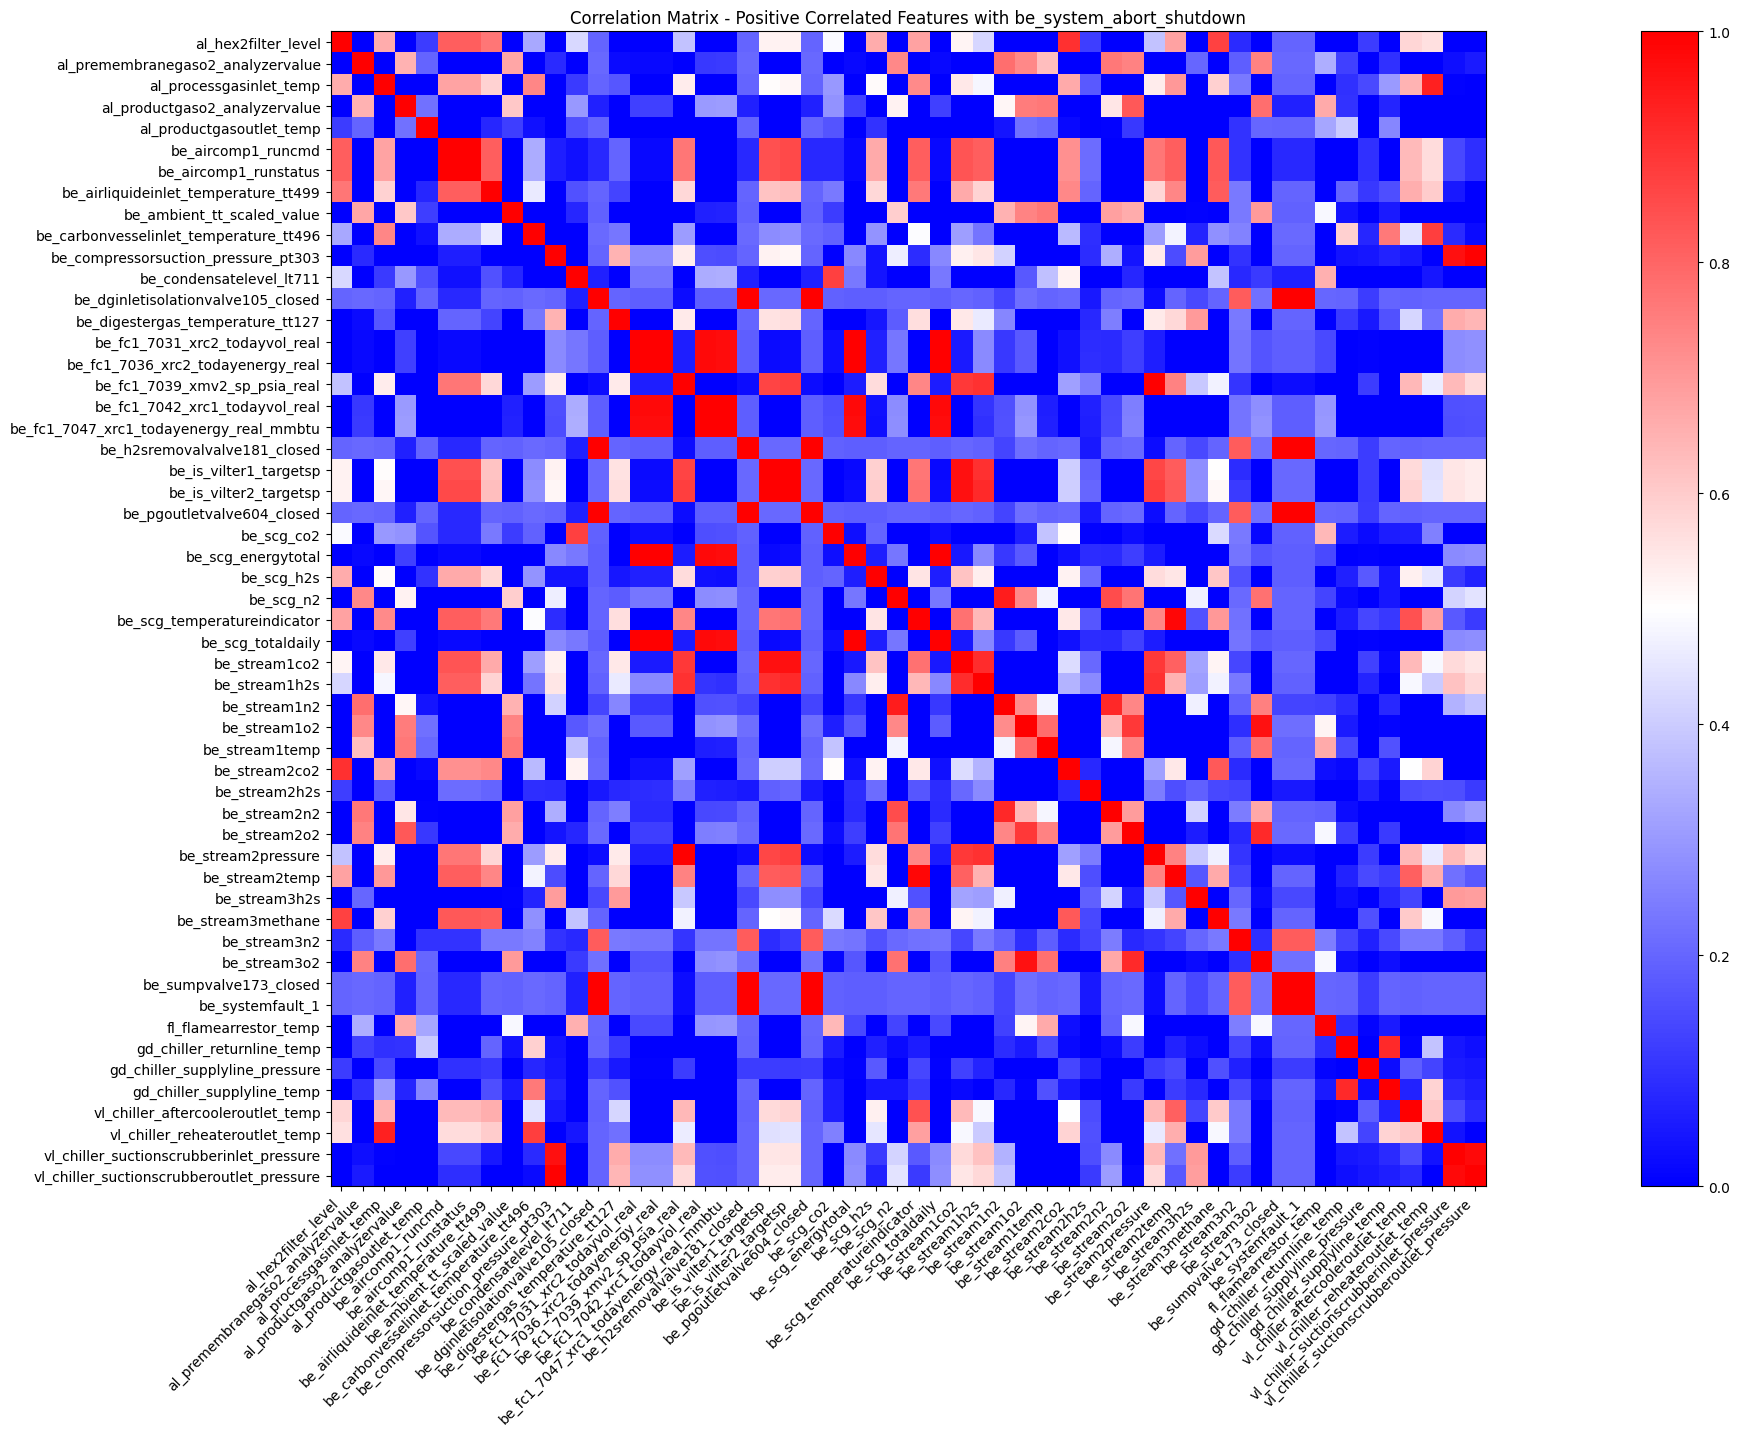

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the target variable name (replace with your actual target variable)
target_variable = target
data = data_corr
data = data.drop("timestamp", axis=1)

# Select features and target variable (consider excluding the index column if present)
features = data.columns.difference([target_variable])

# Exclude target variable from features
df_filtered = data[features].copy()  # Optional: Create a copy to avoid modifying original data

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr(method='spearman')

# Calculate the correlation with the target variable
target_correlation = data[features].corrwith(data[target_variable], method='spearman')

# Filter out features with correlation <= 0
positive_corr_features = target_correlation[target_correlation > 0].index

# Create a new correlation matrix with only positive correlated features
positive_corr_matrix = correlation_matrix.loc[positive_corr_features, positive_corr_features]

# Display the correlation matrix with positive correlated features
print("Correlation Matrix (Positive Correlated Features):")
print(positive_corr_matrix)
# Generate a heatmap for visualization (optional)
plt.figure(figsize=(40, 15))

# Create the heatmap using imshow with masking:
heatmap = plt.imshow(positive_corr_matrix, cmap=plt.cm.bwr, vmin=0, vmax=1)
mask = np.any(np.ones_like(positive_corr_matrix, dtype=bool))
heatmap.set_visible(mask)  # Apply the mask to the heatmap

plt.xticks(range(len(positive_corr_matrix.columns)), positive_corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(positive_corr_matrix.columns)), positive_corr_matrix.columns)
plt.colorbar()
plt.title(f"Correlation Matrix - Positive Correlated Features with {target_variable}")
plt.show()

# **List of correlation to Target value**

Strong Correlations with Target Variable (|correlation| > 0.7):
be_dginletisolationvalve105_closed: 1.0000
be_viltercomp2_faultstatus: 1.0000
be_sumpvalve173_closed: 1.0000
be_system_running: 1.0000
be_systemfault_1: 1.0000
be_vilterchiller_runcmd: 1.0000
be_vilterchiller_runstatus: 1.0000
be_viltercomp1_runcmd: 1.0000
be_airliquide_runstatus: 1.0000
be_airliquide_runcmd: 1.0000
be_sumpvalve173_open: 1.0000
be_viltercomp1_runstatus: 1.0000
be_viltercomp2_runcmd: 1.0000
be_viltercomp2_runstatus: 1.0000
be_gdchiller_runcmd: 1.0000
be_h2sremovalvalve181_closed: 1.0000
be_h2sremovalvalve181_open: 1.0000
be_pgoutletvalve604_closed: 1.0000
be_pgoutletvalve604_open: 1.0000
al_fv_9_cmd: 1.0000
al_fv_3a_2b_do: 1.0000
be_dginletisolationvalve105_open: 1.0000
be_stream3n2: 0.8191
be_stream3o2: 0.2215
be_stream1o2: 0.2177
be_stream2o2: 0.2102
be_carbonvesselinlet_temperature_tt496: 0.2093
be_is_vilter2_targetsp: 0.2068
al_stage1permeate_pressure: 0.2068
be_is_vilter1_targetsp: 0.2066
al_premembran

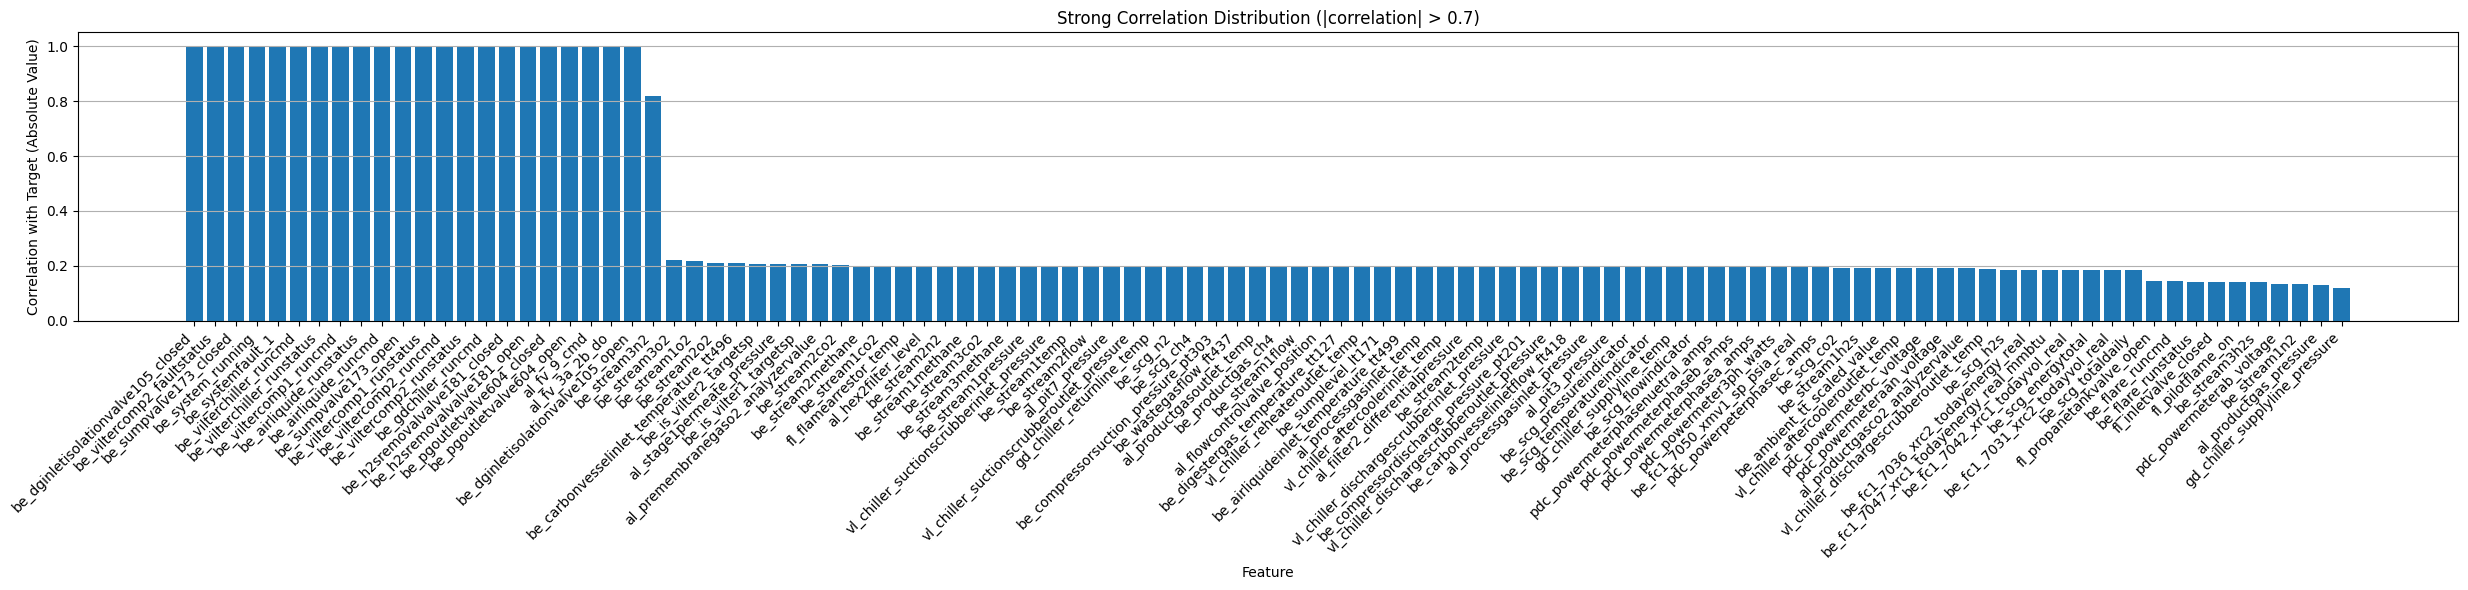

In [35]:
# Filter features with correlation > 0.7 or < -0.7 (absolute values)
filtered_corr = target_correlation[((target_correlation > 0.1) | (target_correlation < -0.1))]

# Sort filtered correlations (if any)
if not filtered_corr.empty:
  sorted_corr = filtered_corr.abs().sort_values(ascending=False)  # Sort by absolute values

  # Prepare data for histogram (optional)
  features = sorted_corr.index.to_numpy()   # Convert index to NumPy array
  correlations = sorted_corr.to_numpy()   # Convert Series to NumPy array

  # Print correlation values and corresponding column names
  print("Strong Correlations with Target Variable (|correlation| > 0.7):")
  for feature, correlation in sorted_corr.items():
    print(f"{feature}: {correlation:.4f}")

  # Create the histogram (optional)
  plt.figure(figsize=(25, 6))
  plt.bar(features, correlations)
  plt.xticks(rotation=45, ha='right')  # Rotate feature labels for readability
  plt.xlabel("Feature")
  plt.ylabel("Correlation with Target (Absolute Value)")
  plt.title("Strong Correlation Distribution (|correlation| > 0.7)")
  plt.grid(axis='y')  # Add gridlines for better visualization
  plt.tight_layout()
  plt.show()
else:
  print("No strong correlations found (|correlation| > 0.7).")

In [40]:
!pip install --upgrade nbconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.5.4
    Uninstalling nbconvert-6.5.4:
      Successfully uninstalled nbconvert-6.5.4


In [7]:
from google.colab import drive

# Mount your Google Drive (run this only once per session)
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
%%shell
jupyter nbconvert --to html ///content/Reportwithcorrelation.ipynb

[NbConvertApp] Converting notebook ///content/Reportwithcorrelation.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvert

CalledProcessError: Command 'jupyter nbconvert --to html ///content/Reportwithcorrelation.ipynb
' returned non-zero exit status 1.